# Linear regression on log-transformed data

It is very common for example in engineering sciences, physics, and economics to perform ordinary least squares (OLS) linear regression in log-transfored space to approximate or *fit* power-law functions. 
In general, the ordinary least squares problem may in the following way:  
Suppose, we want to approximate a function $f$ from observed data $(x_i, y_i)$, where $y_i = f(x_i)$.
We will denote the approximate function $\hat{f}$ which is a parametric function with parameters $\beta$ such that $\hat{f}(x_i, \beta) = \hat{y}_i$ provides an approximate or *predicted* value. 
The least squares problem is to minimize the sum of squared residuals $r_i = \hat{y}_i - \hat{f}(x_i, \beta)$, that is
$$
\min_\beta  \sum_{i=1}^{m} \left( y_i - \hat{f}(x_i, \beta) \right)^2 
$$

If $\hat{f}(x_i, \beta)$ is linear in $\beta$ this constitutes a linear regression problem which is readily solved to global optimality either analytically or numerically. 

## Approximation to a power-law 

Natural phenomena are often well approximated by a power-law ansatz 
$$
\hat{f}(x) = C x^k 
$$

Plotting this function logarithmically yields a straight line plot with slope $k$ and intercept $\log C$, that is,
$$
\begin{aligned}
  \hat{f}(x_i) = \hat{y}_i &= C x_i^k \\
  \log{\hat{y}_i} &= k\,\log{x_i} + \log{C} 
\end{aligned}
$$

It therefore seems straight forward to fit a linear model to the log-transformed data to estimate $k$ and $\log C$. 
This approach is practical, since it avoids the non-linear regression model 
$$
\min_{k,\log{C}} \sum_{i=1}^{m} \left( y_i - C x_i^k \right)^2 
\tag{P1}
$$
by solving the linear model
$$
\min_{k,C^\prime} \sum_{i=1}^{m} \left( \eta_i - k\,\xi_i - C^\prime \right)^2 
\tag{P2}
$$
where
$$
\eta_i = \log{y_i}, \quad \xi_i = \log{x_i} \quad \text{and} \quad C^\prime = \log{C} 
$$

Mathematically this is not the same and biases the transformed problem to emphasize the fit of small-magnitude observations. 
In fact, it may be show that (P2) is equivalent to minimizing the percent error instead of the absolute error since
$$
\eta_i - k\,\xi_i - C^\prime = \log{y_i} - \log{\hat{y}_i} = \log\left(\frac{y_i}{\hat{y}_i}\right)
$$

In general we cannot say that one is better than the other. Or that one is correct and the other is not. 
That will depend on the type of error. 
As we will see next.

## Multiplicative error vs. additive error

**Case 1: Additive error**
$$
f(x) = C x^k + \epsilon
$$

**Case 2: Multiplicative error**
$$
f(x) = C x^k \cdot \epsilon \implies \log y_i = k x_i + \log C + \log \epsilon
$$

In this case $\epsilon$ should be log-normal so $\log \epsilon$ is normal (under the usual assumption of OLS regression). 

In [32]:
import numpy as np

rng = np.random.default_rng(seed=42)

def random_logspace(la,lb,n=100,base=10):
    return np.pow(base,la + (lb-la) * rng.random(n))

### Case 1: Additive normal error

In [33]:
func = lambda x: 3*x**2

n = 5000
x_i = random_logspace(0,2,n)
y_i = func(x_i) + rng.normal(size=n,scale=2)
# y_i = func(x_i) * rng.lognormal(size=n, sigma=1)

In [34]:
mask = y_i >= 0 
x_i = x_i[mask]
y_i = y_i[mask]

In [35]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(np.c_[np.log(x_i)], np.log(y_i))

k = reg.coef_
C = np.exp(reg.intercept_)

estimate = lambda x: C*x**k

[]

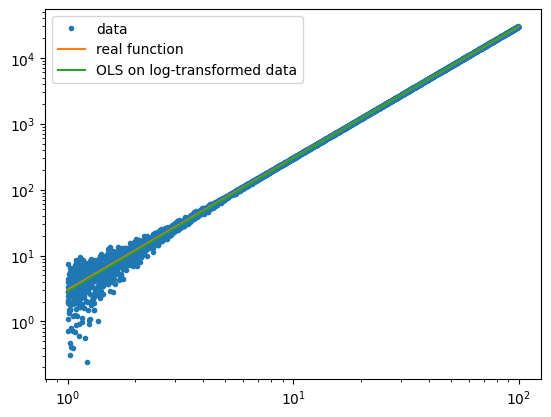

In [36]:
import matplotlib.pyplot as plt

X = np.logspace(0,2)
Y1 = func(X)
Y2 = estimate(X)

plt.plot(x_i,y_i, '.', label='data')
plt.plot(X,Y1, label='real function')
plt.plot(X,Y2, label='OLS on log-transformed data')

# plt.xlim(0,100)
# plt.ylim(0,func(100)*2)

plt.legend()
plt.loglog()

### Case 2: Multiplicative log-normal error

In [53]:
func = lambda x: 3*x**2

n = 5000
x_i = random_logspace(0,2,n)
y_i = func(x_i) * rng.lognormal(size=n, sigma=1)

In [54]:
mask = y_i >= 0 
x_i = x_i[mask]
y_i = y_i[mask]

In [55]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(np.c_[np.log(x_i)], np.log(y_i))

k = reg.coef_
C = np.exp(reg.intercept_)

estimate = lambda x: C*x**k

[]

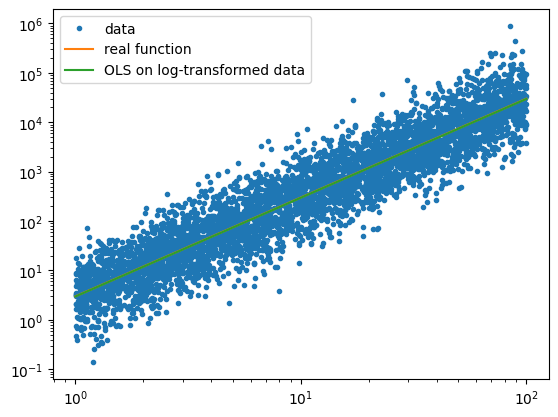

In [56]:
import matplotlib.pyplot as plt

X = np.logspace(0,2)
Y1 = func(X)
Y2 = estimate(X)

plt.plot(x_i,y_i, '.', label='data')
plt.plot(X,Y1, label='real function')
plt.plot(X,Y2, label='OLS on log-transformed data')

# plt.xlim(0,100)
# plt.ylim(0,func(100)*2)

plt.legend()
plt.loglog()